In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import gower

In [2]:
table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}3_3060.csv' 
df_trd_36 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_CUS_IFO_TMP' 
names = ['cus_no','sex_dit_cd','cus_age','zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}_3060.csv' 
df_cus_36 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_ACT_IFO_TMP' 
names = ['act_no','cus_no','act_opn_ym'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}_3060.csv' 
df_act_36 = pd.read_csv(file_path) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_act_36 = df_act_36.drop('Unnamed: 0', axis=1)
df_cus_36 = df_cus_36.drop('Unnamed: 0', axis=1)
df_trd_36 = df_trd_36.drop('Unnamed: 0', axis=1)

In [4]:
table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_trd_13_1 = pd.read_csv(file_path)

table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}2_1030.csv' 
df_trd_13_2 = pd.read_csv(file_path) 


table_nm = 'DLAB_HT_L1_CUS_IFO_TMP' 
names = ['cus_no','sex_dit_cd','cus_age','zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_cus_13 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_ACT_IFO_TMP' 
names = ['act_no','cus_no','act_opn_ym'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_act_13 = pd.read_csv(file_path) 

In [5]:
df_trd_13 = pd.merge(left=df_trd_13_1, right=df_trd_13_2[df_trd_13_2['iqr_dt'] > 20210701], how='outer')

In [6]:
df_act_13 = df_act_13.drop('Unnamed: 0', axis=1)
df_cus_13 = df_cus_13.drop('Unnamed: 0', axis=1)
df_trd_13 = df_trd_13.drop('Unnamed: 0', axis=1)

In [40]:
df_cus = pd.merge(df_cus_13, df_cus_36, how='outer')
df_act = pd.merge(df_act_13, df_act_36, how='outer')

In [94]:
df_trd_1231 = pd.concat([df_trd_13[df_trd_13['iqr_dt'] == 20211231], df_trd_36[df_trd_36['iqr_dt'] == 20211231]])
df_trd = df_trd_1231.copy()

In [102]:
kmodes_cluster = pd.read_csv('../data/bank_kmode_cluster.csv')

In [352]:
kmodes_cluster.groupby('cluster').count()

,cus_no
cluster,
0,451
1,257
2,251
3,348
4,89
5,94


In [370]:
df_trd.groupby('iem_krl_anm').count().sort_values('cus_no', ascending=False)

,iqr_dt,cus_no,act_no,mkt_gb,pdt_gb,iem_cd,bnc_qty,tot_aet_amt
iem_krl_anm,,,,,,,,
삼성전자,634,634,634,634,634,634,634,634
카카오,227,227,227,227,227,227,227,227
삼성전자우,160,160,160,160,160,160,160,160
현대차,135,135,135,135,135,135,135,135
대한항공,114,114,114,114,114,114,114,114
SK하이닉스,102,102,102,102,102,102,102,102
롯데렌탈,86,86,86,86,86,86,86,86
NAVER,84,84,84,84,84,84,84,84
HMM,83,83,83,83,83,83,83,83


In [104]:
df_cus_0 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 0]['cus_no'])]
df_cus_1 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 1]['cus_no'])]
df_cus_2 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 2]['cus_no'])]
df_cus_3 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 3]['cus_no'])]
df_cus_4 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 4]['cus_no'])]
df_cus_5 = df_cus.copy()[df_cus['cus_no'].isin(kmodes_cluster[kmodes_cluster['cluster'] == 5]['cus_no'])]

In [106]:
df_cus_list = [df_cus_0, df_cus_1, df_cus_2, df_cus_3, df_cus_4, df_cus_5]

In [113]:
df_bal = df_trd.copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal = df_bal.reset_index()

In [114]:
df_bal_kor_stk = df_trd[(df_trd['mkt_gb'] == '국내') 
                        & (df_trd['pdt_gb'] == '주식')].copy()[['iqr_dt', 
                                                              'cus_no', 
                                                              'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                       'cus_no']).sum()
df_bal_kor_stk = df_bal_kor_stk.reset_index()
df_bal_ovs_stk = df_trd[(df_trd['mkt_gb'] == '해외') 
                        & (df_trd['pdt_gb'] == '주식')].copy()[['iqr_dt', 
                                                              'cus_no', 
                                                              'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                       'cus_no']).sum()
df_bal_ovs_stk = df_bal_ovs_stk.reset_index()

In [115]:
df_bal_kor_etf = df_trd[(df_trd['mkt_gb'] == '국내') 
                        & (df_trd['pdt_gb'] == 'ETF')].copy()[['iqr_dt', 
                                                               'cus_no', 
                                                               'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                        'cus_no']).sum()
df_bal_kor_etf = df_bal_kor_etf.reset_index()
df_bal_ovs_etf = df_trd[(df_trd['mkt_gb'] == '해외') 
                        & (df_trd['pdt_gb'] == 'ETF')].copy()[['iqr_dt', 
                                                               'cus_no', 
                                                               'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                        'cus_no']).sum()
df_bal_ovs_etf = df_bal_ovs_etf.reset_index()

In [116]:
df_bal_tot = pd.merge(left=df_bal, 
                      right=df_bal_kor_stk[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kor_stk'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_ovs_stk[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ovs_stk'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_kor_etf[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kor_etf'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_ovs_etf[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ovs_etf'), 
                      how='left')

In [117]:
df_bal_tot[['tot_aet_amt_kor_stk', 
            'tot_aet_amt_ovs_stk', 
            'tot_aet_amt_kor_etf', 
            'tot_aet_amt_ovs_etf']] = df_bal_tot[['tot_aet_amt_kor_stk', 
                                                  'tot_aet_amt_ovs_stk', 
                                                  'tot_aet_amt_kor_etf', 
                                                  'tot_aet_amt_ovs_etf']].fillna(0)

In [173]:
df_bal_clusters = []
for i in range(len(kmodes_cluster['cluster'].unique())):
    df = pd.merge(left=df_cus_list[i], right=df_bal_tot, on='cus_no', suffixes=('','')) #if how='left', customers who haven't opened an account appear
    df['kor_etf_ratio'] = df['tot_aet_amt_kor_etf'] / (df['tot_aet_amt_kor_stk']+df['tot_aet_amt_kor_etf'])
    df['ovs_etf_ratio'] = df['tot_aet_amt_ovs_etf'] / (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'])
    df['kor_ovs_amt_ratio'] = (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'] )/ df['tot_aet_amt']
    df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']] = df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']].fillna(0)
    df_bal_clusters.append(df)

In [354]:
ten_thirty = df_bal_clusters[0].set_index(keys='cus_no')
ten_thirty = ten_thirty.drop(['iqr_dt'], axis=1)
#ten_thirty = (ten_thirty.copy() - ten_thirty.mean()) / ten_thirty.std()
dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[[
                                                      'tot_aet_amt',
                                                      'kor_etf_ratio',
                                                      'ovs_etf_ratio',
                                                      'kor_ovs_amt_ratio',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)
dbscan_cluster = DBSCAN(eps=0.0001, min_samples=20, metric='precomputed')
dbscan_cluster.fit(dist_mat)
ten_thirty ['cluster'] = dbscan_cluster.labels_
ten_thirty_grp = ten_thirty.groupby('cluster').count()
display(ten_thirty_grp)

,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,,,,
-1,366,366,366,366,366,366,366,366,366,366,366,366,366
0,85,85,85,85,85,85,85,85,85,85,85,85,85


In [355]:
ten_thirty.groupby('cluster').mean()

,sex_dit_cd,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,
-1,1.866120,36.814208,2.791943e+07,2.477110e+07,2.022216e+06,933270.437158,192835.169399,0.054111,0.042814,0.168211
0,1.917647,33.058824,5.524375e+05,5.524375e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [356]:
for i in range(len(ten_thirty_grp)):
    print('Group:' + str(i-1))
    display(top_five(i))

Group:-1


iem_krl_anm
삼성전자     0.530055
카카오      0.221311
삼성전자우    0.147541
현대차      0.144809
NAVER    0.098361
Name: cus_no, dtype: float64

Group:0


iem_krl_anm
삼성전자        0.317647
카카오         0.129412
에스디바이오센서    0.082353
롯데렌탈        0.070588
삼성전자우       0.070588
Name: cus_no, dtype: float64

In [357]:
ten_thirty = ten_thirty[ten_thirty['cluster'] == -1]
#ten_thirty = ten_thirty.drop(['iqr_dt'], axis=1)
#ten_thirty = (ten_thirty.copy() - ten_thirty.mean()) / ten_thirty.std()
dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[[
                                                      'tot_aet_amt',
                                                      'kor_etf_ratio',
                                                      'ovs_etf_ratio',
                                                      'kor_ovs_amt_ratio',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)
dbscan_cluster = DBSCAN(eps=0.01, min_samples=10, metric='precomputed')
dbscan_cluster.fit(dist_mat)
ten_thirty ['cluster'] = dbscan_cluster.labels_
ten_thirty_grp = ten_thirty.groupby('cluster').count()
display(ten_thirty_grp)

,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,,,,
-1,123,123,123,123,123,123,123,123,123,123,123,123,123
0,24,24,24,24,24,24,24,24,24,24,24,24,24
1,219,219,219,219,219,219,219,219,219,219,219,219,219


In [358]:
ten_thirty.groupby('cluster').mean()

,sex_dit_cd,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,
-1,1.861789,35.048780,5.358729e+07,4.508526e+07,5.173519e+06,2.754713e+06,573802.211382,0.158182,0.127398,0.301878
0,1.625000,27.541667,4.057142e+06,1.011000e+04,4.047032e+06,0.000000e+00,0.000000,0.000000,0.000000,0.996917
1,1.894977,38.821918,1.611827e+07,1.607532e+07,3.040842e+04,1.254489e+04,0.000000,0.001590,0.000000,0.002321


In [360]:
for i in range(len(ten_thirty_grp)):
    print('Group:' + str(i-1))
    display(top_five(i))

Group:-1


iem_krl_anm
삼성전자     0.544715
카카오      0.227642
삼성전자우    0.195122
애플       0.162602
현대차      0.154472
Name: cus_no, dtype: float64

Group:0


iem_krl_anm
애플             0.333333
AMD            0.125000
Lucid Group    0.125000
엔비디아           0.083333
IONQ           0.083333
Name: cus_no, dtype: float64

Group:1


iem_krl_anm
삼성전자     0.575342
카카오      0.242009
현대차      0.155251
삼성전자우    0.136986
대한항공     0.114155
Name: cus_no, dtype: float64

In [366]:
i=1
df_trd[(df_trd['iqr_dt'] == 20211231) 
           & (df_trd['cus_no'].isin(ten_thirty[ten_thirty['cluster'] == i-1].reset_index()['cus_no']))].groupby('iem_krl_anm').count().sort_values(by='iqr_dt', 
                                                                                                                                                 ascending=False)['cus_no'].head(10) / ten_thirty_grp['cus_age'][i-1]

iem_krl_anm
애플                0.333333
AMD               0.125000
Lucid Group       0.125000
엔비디아              0.083333
IONQ              0.083333
마이크로소프트           0.083333
Meta Platforms    0.083333
보잉                0.083333
코카콜라              0.083333
존슨앤드존슨            0.041667
Name: cus_no, dtype: float64

In [349]:
ten_thirty = ten_thirty[ten_thirty['cluster'] == -1]
#ten_thirty = ten_thirty.drop(['iqr_dt'], axis=1)
#ten_thirty = (ten_thirty.copy() - ten_thirty.mean()) / ten_thirty.std()
dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[[
                                                      'tot_aet_amt',
                                                      'kor_etf_ratio',
                                                      'ovs_etf_ratio',
                                                      'kor_ovs_amt_ratio',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)
dbscan_cluster = DBSCAN(eps=0.1, min_samples=10, metric='precomputed')
dbscan_cluster.fit(dist_mat)
ten_thirty ['cluster'] = dbscan_cluster.labels_
ten_thirty_grp = ten_thirty.groupby('cluster').count()
display(ten_thirty_grp)

,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,,,,
-1,17,17,17,17,17,17,17,17,17,17,17,17,17
0,106,106,106,106,106,106,106,106,106,106,106,106,106


In [350]:
ten_thirty.groupby('cluster').mean()

,sex_dit_cd,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,
-1,1.764706,34.352941,5.222960e+07,4.603964e+07,2.545521e+06,1.837036e+06,1.807398e+06,0.310816,0.677355,0.458771
0,1.877358,35.160377,5.380504e+07,4.493220e+07,5.594990e+06,2.901887e+06,3.759614e+05,0.133702,0.039198,0.276717


In [351]:
for i in range(len(ten_thirty_grp)):
    print('Group:' + str(i-1))
    display(top_five(i))

Group:-1


iem_krl_anm
삼성전자                         0.470588
삼성전자우                        0.294118
TIGER 미국S&P500               0.294118
INVSC QQQ TRUST SRS 1 ETF    0.235294
TIGER 200                    0.176471
Name: cus_no, dtype: float64

Group:0


iem_krl_anm
삼성전자     0.556604
카카오      0.254717
애플       0.179245
삼성전자우    0.179245
현대차      0.179245
Name: cus_no, dtype: float64

In [242]:
ten_thirty.groupby('cluster').mean()

,sex_dit_cd,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,,
-1,1.941176,45.176471,1.067358e+08,8.567283e+07,1.401981e+07,5.380059e+06,1.663117e+06,0.119440,0.070900,0.206932
0,1.996979,36.939577,8.967879e+06,8.806600e+06,1.128969e+05,4.139924e+04,6.982384e+03,0.012645,0.009782,0.017239


In [176]:
def top_five(i):
    return df_trd[(df_trd['iqr_dt'] == 20211231) 
           & (df_trd['cus_no'].isin(ten_thirty[ten_thirty['cluster'] == i-1].reset_index()['cus_no']))].groupby('iem_krl_anm').count().sort_values(by='iqr_dt', 
                                                                                                                                                 ascending=False)['cus_no'].head() / ten_thirty_grp['cus_age'][i-1]

In [177]:
for i in range(len(ten_thirty_grp)):
    print('Group:' + str(i-1))
    display(top_five(i))

Group:-1


iem_krl_anm
삼성전자      0.500000
카카오       0.178571
삼성전자우     0.119048
롯데렌탈      0.107143
SK하이닉스    0.107143
Name: cus_no, dtype: float64

Group:0


iem_krl_anm
삼성전자      0.593333
카카오       0.240000
삼성전자우     0.140000
대한항공      0.133333
SK하이닉스    0.100000
Name: cus_no, dtype: float64

Group:1


iem_krl_anm
삼성전자    0.438596
HMM     0.122807
카카오     0.087719
롯데렌탈    0.070175
현대차     0.052632
Name: cus_no, dtype: float64

Group:2


iem_krl_anm
삼성전자     0.333333
대한항공     0.175439
롯데렌탈     0.140351
삼성전자우    0.140351
카카오      0.122807
Name: cus_no, dtype: float64

In [227]:
for i in range(len(kmodes_cluster['cluster'].unique())):
    ten_thirty = df_bal_clusters[i].set_index(keys='cus_no')
    ten_thirty = ten_thirty.drop(['ivs_icn_cd', 'iqr_dt', 'zip_ctp_cd', 'tco_cus_grd_cd', 'sex_dit_cd'], axis=1)
    ten_thirty = (ten_thirty.copy() - ten_thirty.mean()) / ten_thirty.std()
    dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[[
                                                      'tot_aet_amt_kor_stk',
                                                      'tot_aet_amt_ovs_stk',
                                                      'tot_aet_amt_kor_etf',
                                                      'tot_aet_amt_ovs_etf',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)
    dbscan_cluster = DBSCAN(eps=0.3, min_samples=10)
    dbscan_cluster.fit(ten_thirty)
    ten_thirty ['cluster'] = dbscan_cluster.labels_
    ten_thirty_grp = ten_thirty.groupby('cluster').count()
    display(ten_thirty_grp)

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,176,176,176,176,176,176,176,176,176
0,265,265,265,265,265,265,265,265,265
1,10,10,10,10,10,10,10,10,10


,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,126,126,126,126,126,126,126,126,126
0,118,118,118,118,118,118,118,118,118
1,13,13,13,13,13,13,13,13,13


,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,74,74,74,74,74,74,74,74,74
0,168,168,168,168,168,168,168,168,168
1,9,9,9,9,9,9,9,9,9


,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,98,98,98,98,98,98,98,98,98
0,250,250,250,250,250,250,250,250,250


,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,52,52,52,52,52,52,52,52,52
0,29,29,29,29,29,29,29,29,29
1,8,8,8,8,8,8,8,8,8


,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,82,82,82,82,82,82,82,82,82
0,12,12,12,12,12,12,12,12,12


In [136]:
ten_thirty = df_bal_clusters[0].set_index(keys='cus_no')
ten_thirty = ten_thirty.drop(['ivs_icn_cd', 'iqr_dt', 'zip_ctp_cd', 'tco_cus_grd_cd', 'sex_dit_cd'], axis=1)
#ten_thirty = ten_thirty.drop(['tco_cus_grd_cd', 'tot_aet_amt', 'kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio'], axis=1)
#ten_thirty ['sex_dit_cd'] = ten_thirty['sex_dit_cd'].replace({1:'M', 2:'F'})
# ten_thirty[['tot_aet_amt_kor_stk',
#             'tot_aet_amt_ovs_stk',
#             'tot_aet_amt_kor_etf',
#             'tot_aet_amt_ovs_etf']] = np.log10(ten_thirty[['tot_aet_amt_kor_stk',
#                                                         'tot_aet_amt_ovs_stk',
#                                                         'tot_aet_amt_kor_etf',
#                                                         'tot_aet_amt_ovs_etf']],
#                                              where = (ten_thirty[['tot_aet_amt_kor_stk',
#                                                         'tot_aet_amt_ovs_stk',
#                                                         'tot_aet_amt_kor_etf',
#                                                         'tot_aet_amt_ovs_etf']] != 0))

In [137]:
dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[['cus_age',
                                                      'tot_aet_amt_kor_stk',
                                                      'tot_aet_amt_ovs_stk',
                                                      'tot_aet_amt_kor_etf',
                                                      'tot_aet_amt_ovs_etf',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)

In [143]:
dbscan_cluster = DBSCAN(eps=0.005, min_samples=20, metric='precomputed')
dbscan_cluster.fit(dist_mat)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [144]:
ten_thirty ['cluster'] = dbscan_cluster.labels_
ten_thirty_grp = ten_thirty.groupby('cluster').count()
ten_thirty_grp

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,281,281,281,281,281,281,281,281,281
0,170,170,170,170,170,170,170,170,170


In [140]:
ten_thirty.groupby('cluster').mean()

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,36.10643,2.276157e+07,2.020661e+07,1.641089e+06,757376.895787,156491.512195,0.043913,0.034745,0.136508


In [44]:
#choose 440 customers with trd data & remove 이상한 데이터 (customers with US25459W4583)
df_cus_w = df_cus.copy()[(df_cus['cus_no'].isin(df_trd['cus_no'])) 
                         & ~(df_cus['cus_no'].isin(df_trd[(df_trd['iem_cd'] == "US25459W4583")]['cus_no']))]

In [45]:
df_bal = df_trd.copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal = df_bal.reset_index()

In [46]:
df_bal_kor_stk = df_trd[(df_trd['mkt_gb'] == '국내') 
                        & (df_trd['pdt_gb'] == '주식')].copy()[['iqr_dt', 
                                                              'cus_no', 
                                                              'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                       'cus_no']).sum()
df_bal_kor_stk = df_bal_kor_stk.reset_index()
df_bal_ovs_stk = df_trd[(df_trd['mkt_gb'] == '해외') 
                        & (df_trd['pdt_gb'] == '주식')].copy()[['iqr_dt', 
                                                              'cus_no', 
                                                              'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                       'cus_no']).sum()
df_bal_ovs_stk = df_bal_ovs_stk.reset_index()

In [47]:
df_bal_kor_etf = df_trd[(df_trd['mkt_gb'] == '국내') 
                        & (df_trd['pdt_gb'] == 'ETF')].copy()[['iqr_dt', 
                                                               'cus_no', 
                                                               'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                        'cus_no']).sum()
df_bal_kor_etf = df_bal_kor_etf.reset_index()
df_bal_ovs_etf = df_trd[(df_trd['mkt_gb'] == '해외') 
                        & (df_trd['pdt_gb'] == 'ETF')].copy()[['iqr_dt', 
                                                               'cus_no', 
                                                               'tot_aet_amt']].groupby(['iqr_dt', 
                                                                                        'cus_no']).sum()
df_bal_ovs_etf = df_bal_ovs_etf.reset_index()

In [48]:
df_bal_tot = pd.merge(left=df_bal, 
                      right=df_bal_kor_stk[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kor_stk'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_ovs_stk[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ovs_stk'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_kor_etf[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kor_etf'), 
                      how='left')
df_bal_tot = pd.merge(left=df_bal_tot, 
                      right=df_bal_ovs_etf[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ovs_etf'), 
                      how='left')

In [49]:
df_bal_tot[['tot_aet_amt_kor_stk', 
            'tot_aet_amt_ovs_stk', 
            'tot_aet_amt_kor_etf', 
            'tot_aet_amt_ovs_etf']] = df_bal_tot[['tot_aet_amt_kor_stk', 
                                                  'tot_aet_amt_ovs_stk', 
                                                  'tot_aet_amt_kor_etf', 
                                                  'tot_aet_amt_ovs_etf']].fillna(0)

In [23]:
df_bal_list = []
for i in df_bal_tot['iqr_dt'].unique():
    df = df_bal_tot[df_bal_tot['iqr_dt'] == i]
    df = pd.merge(left=df_cus_w, right=df, on='cus_no', suffixes=('','')) #if how='left', customers who haven't opened an account appear
    df['kor_etf_ratio'] = df['tot_aet_amt_kor_etf'] / (df['tot_aet_amt_kor_stk']+df['tot_aet_amt_kor_etf'])
    df['ovs_etf_ratio'] = df['tot_aet_amt_ovs_etf'] / (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'])
    df['kor_ovs_amt_ratio'] = (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'] )/ df['tot_aet_amt']
    df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']] = df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']].fillna(0)
    df_bal_list.append(df)

In [50]:
df = pd.merge(left=df_cus_w, right=df_bal_tot, on='cus_no', suffixes=('','')) #if how='left', customers who haven't opened an account appear
df['kor_etf_ratio'] = df['tot_aet_amt_kor_etf'] / (df['tot_aet_amt_kor_stk']+df['tot_aet_amt_kor_etf'])
df['ovs_etf_ratio'] = df['tot_aet_amt_ovs_etf'] / (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'])
df['kor_ovs_amt_ratio'] = (df['tot_aet_amt_ovs_stk']+df['tot_aet_amt_ovs_etf'] )/ df['tot_aet_amt']
df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']] = df[['kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio']].fillna(0)

In [74]:
ten_thirty = df.set_index(keys='cus_no')
ten_thirty = ten_thirty.drop(['ivs_icn_cd', 'iqr_dt', 'zip_ctp_cd', 'tco_cus_grd_cd', 'sex_dit_cd'], axis=1)
#ten_thirty = ten_thirty.drop(['tco_cus_grd_cd', 'tot_aet_amt', 'kor_etf_ratio', 'ovs_etf_ratio', 'kor_ovs_amt_ratio'], axis=1)
#ten_thirty ['sex_dit_cd'] = ten_thirty['sex_dit_cd'].replace({1:'M', 2:'F'})
# ten_thirty[['tot_aet_amt_kor_stk',
#             'tot_aet_amt_ovs_stk',
#             'tot_aet_amt_kor_etf',
#             'tot_aet_amt_ovs_etf']] = np.log10(ten_thirty[['tot_aet_amt_kor_stk',
#                                                         'tot_aet_amt_ovs_stk',
#                                                         'tot_aet_amt_kor_etf',
#                                                         'tot_aet_amt_ovs_etf']],
#                                              where = (ten_thirty[['tot_aet_amt_kor_stk',
#                                                         'tot_aet_amt_ovs_stk',
#                                                         'tot_aet_amt_kor_etf',
#                                                         'tot_aet_amt_ovs_etf']] != 0))

In [87]:
dist_mat = pd.DataFrame(gower.gower_matrix(ten_thirty[['cus_age',
                                                      'tot_aet_amt_kor_stk',
                                                      'tot_aet_amt_ovs_stk',
                                                      'tot_aet_amt_kor_etf',
                                                      'tot_aet_amt_ovs_etf',
                                                      ]]), index=ten_thirty .index, columns=ten_thirty.index)

In [88]:
dbscan_cluster = DBSCAN(eps=0.001, min_samples=20, metric='precomputed')
dbscan_cluster.fit(dist_mat)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [89]:
ten_thirty ['cluster'] = dbscan_cluster.labels_
ten_thirty_grp = ten_thirty.groupby('cluster').count()
ten_thirty_grp

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,1025,1025,1025,1025,1025,1025,1025,1025,1025
0,49,49,49,49,49,49,49,49,49
1,24,24,24,24,24,24,24,24,24
2,35,35,35,35,35,35,35,35,35
3,28,28,28,28,28,28,28,28,28
4,35,35,35,35,35,35,35,35,35
5,30,30,30,30,30,30,30,30,30
6,21,21,21,21,21,21,21,21,21
7,36,36,36,36,36,36,36,36,36


In [90]:
ten_thirty.groupby('cluster').mean()

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,40.491707,3.811577e+07,3.394083e+07,2.523955e+06,1.129815e+06,521168.658537,0.050175,0.045270,0.130590
0,30.000000,3.431275e+06,3.371007e+06,5.755945e+04,2.708367e+03,0.000000,0.001556,0.000000,0.088688
1,25.000000,1.957530e+06,1.880061e+06,7.746912e+04,0.000000e+00,0.000000,0.000000,0.000000,0.137584
2,28.000000,3.528076e+06,3.473060e+06,3.053917e+04,2.447671e+04,0.000000,0.023436,0.000000,0.061596
3,26.000000,2.086476e+06,2.083753e+06,2.722857e+03,0.000000e+00,0.000000,0.000000,0.000000,0.002110
4,22.000000,2.035316e+06,2.012413e+06,5.281571e+03,1.762114e+04,0.000000,0.027109,0.000000,0.009743
5,27.000000,2.767958e+06,2.717446e+06,4.854427e+04,1.967333e+03,0.000000,0.000556,0.000000,0.085455
6,20.000000,1.692400e+06,1.645117e+06,4.728224e+04,0.000000e+00,0.000000,0.000000,0.000000,0.017904
7,29.000000,3.550958e+06,3.547943e+06,0.000000e+00,3.015139e+03,0.000000,0.002082,0.000000,0.000000


In [91]:
ten_thirty_x = ten_thirty.copy()[ten_thirty['cluster'] == -1]
dist_mat_x = pd.DataFrame(gower.gower_matrix(ten_thirty_x), index=ten_thirty_x .index, columns=ten_thirty_x.index)
dbscan_cluster_x = DBSCAN(eps=0.005, min_samples=15, metric='precomputed')
dbscan_cluster_x.fit(dist_mat_x)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [92]:
ten_thirty_x['cluster'] = dbscan_cluster_x.labels_
ten_thirty_x_grp = ten_thirty_x.groupby('cluster').count()
ten_thirty_x_grp

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,442,442,442,442,442,442,442,442,442
0,36,36,36,36,36,36,36,36,36
1,547,547,547,547,547,547,547,547,547


In [84]:
ten_thirty_x.groupby('cluster').mean()

,cus_age,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cluster,,,,,,,,,
-1,38.072398,7.125057e+07,6.158265e+07,5.843996e+06,2.615327e+06,1.208592e+06,0.115987,0.104981,0.302289
0,13.388889,4.227271e+06,4.226158e+06,0.000000e+00,1.112917e+03,0.000000e+00,0.000861,0.000000,0.000000
1,44.230347,1.357172e+07,1.356065e+07,7.326936e+03,3.740009e+03,0.000000e+00,0.000242,0.000000,0.000444


In [165]:
def top_five(i):
    return df_trd[(df_trd['iqr_dt'] == 20211231) 
           & (df_trd['cus_no'].isin(ten_thirty[ten_thirty['cluster'] == i-1].reset_index()['cus_no']))].groupby('iem_krl_anm').count().sort_values(by='iqr_dt', 
                                                                                                                                                 ascending=False)['cus_no'].head() / ten_thirty_grp['cus_age'][i-1]

In [949]:
i = 0
df_trd[(df_trd['iqr_dt'] == 20211231) 
           & (df_trd['cus_no'].isin(ten_thirty_x[ten_thirty_x['cluster'] == i-1].reset_index()['cus_no']))].groupby('iem_krl_anm').count().sort_values(by='iqr_dt', 
                                                                                                                                                 ascending=False)['cus_no'].head() / ten_thirty_x_grp['cus_age'][i-1]

iem_krl_anm
삼성전자                         0.291667
TIGER KRX2차전지K-뉴딜            0.208333
TIGER 미국S&P500               0.208333
TIGER 미국필라델피아반도체나스닥          0.208333
INVSC QQQ TRUST SRS 1 ETF    0.166667
Name: cus_no, dtype: float64

In [950]:
i = 1
df_trd[(df_trd['iqr_dt'] == 20211231) 
           & (df_trd['cus_no'].isin(ten_thirty_x[ten_thirty_x['cluster'] == i-1].reset_index()['cus_no']))].groupby('iem_krl_anm').count().sort_values(by='iqr_dt', 
                                                                                                                                                 ascending=False)['cus_no'].head() / ten_thirty_x_grp['cus_age'][i-1]

iem_krl_anm
삼성전자    0.586207
애플      0.310345
스타벅스    0.206897
현대차     0.206897
카카오     0.206897
Name: cus_no, dtype: float64

In [951]:
for i in range(len(ten_thirty_grp)):
    print('Group:' + str(i-1))
    print(top_five(i))

Group:-1
iem_krl_anm
삼성전자                         0.452830
애플                           0.226415
INVSC QQQ TRUST SRS 1 ETF    0.150943
삼성전자우                        0.132075
카카오                          0.132075
Name: cus_no, dtype: float64
Group:0
iem_krl_anm
삼성전자                 0.44
삼성전자우                0.44
카카오                  0.24
SK하이닉스               0.20
TIGER KRX2차전지K-뉴딜    0.20
Name: cus_no, dtype: float64
Group:1
iem_krl_anm
삼성전자     0.505102
카카오      0.186224
삼성전자우    0.104592
대한항공     0.102041
현대차      0.076531
Name: cus_no, dtype: float64
Group:2
iem_krl_anm
애플                0.272727
AMD               0.227273
Meta Platforms    0.136364
보잉                0.090909
엔비디아              0.090909
Name: cus_no, dtype: float64


In [942]:
plt.scatter(ten_thirty['ovs_aet_amt'], ten_thirty['kor_ovs_amt_ratio'])

KeyError: 'ovs_aet_amt'

In [685]:
ten_thirty_db = ten_thirty.copy()[['tot_aet_amt',
                                                          'kor_ovs_amt_ratio'
                                                      ]]
dist_mat_db = pd.DataFrame(gower.gower_matrix(ten_thirty_db), index=ten_thirty_db.index, columns=ten_thirty_db.index)

In [719]:
dbscan_cluster_db = DBSCAN(eps=0.1, min_samples=20, metric='precomputed')
dbscan_cluster_db.fit(dist_mat_db)

ten_thirty_db['cluster'] = dbscan_cluster_db.labels_
ten_thirty_grp_db = ten_thirty_db.groupby('cluster').count()
ten_thirty_grp_db

,tot_aet_amt,kor_ovs_amt_ratio
cluster,,
-1,9,9
0,373,373
1,30,30


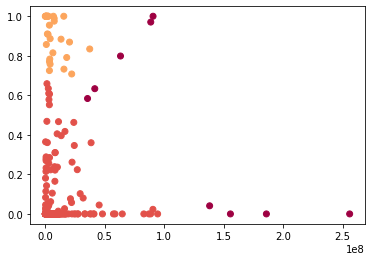

In [720]:
cmap = plt.cm.get_cmap("Spectral")
colors = cmap((ten_thirty_db['cluster']+1) / 7)
plt.scatter(ten_thirty_db['tot_aet_amt'], ten_thirty_db['kor_ovs_amt_ratio'], c=colors)
plt.show()

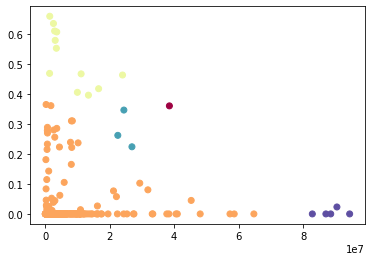

In [776]:
ten_thirty_db_0 = ten_thirty_db[ten_thirty_db['cluster'] == 0].copy()
dist_mat_db_0 = pd.DataFrame(gower.gower_matrix(ten_thirty_db_0), 
                             index=ten_thirty_db_0.index, 
                             columns=ten_thirty_db_0.index)
dbscan_cluster_db_0 = DBSCAN(eps=0.05, min_samples=2, metric='precomputed')
dbscan_cluster_db_0.fit(dist_mat_db_0)

ten_thirty_db_0['cluster'] = dbscan_cluster_db_0.labels_
ten_thirty_grp_db_0 = ten_thirty_db_0.groupby('cluster').count()
cmap = plt.cm.get_cmap("Spectral")
colors = cmap((ten_thirty_db_0['cluster']+1) / 3.5)
plt.scatter(ten_thirty_db_0['tot_aet_amt'], ten_thirty_db_0['kor_ovs_amt_ratio'], c=colors)
plt.show()

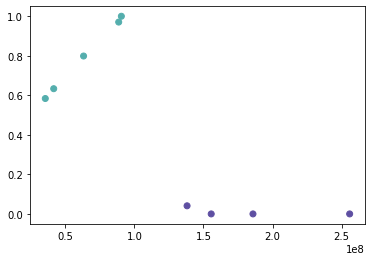

In [765]:
ten_thirty_db_0 = ten_thirty_db[ten_thirty_db['cluster'] == -1].copy()
dist_mat_db_0 = pd.DataFrame(gower.gower_matrix(ten_thirty_db_0), 
                             index=ten_thirty_db_0.index, 
                             columns=ten_thirty_db_0.index)
dbscan_cluster_db_0 = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')
dbscan_cluster_db_0.fit(dist_mat_db_0)

ten_thirty_db_0['cluster'] = dbscan_cluster_db_0.labels_
ten_thirty_grp_db_0 = ten_thirty_db_0.groupby('cluster').count()
cmap = plt.cm.get_cmap("Spectral")
colors = cmap((ten_thirty_db_0['cluster']+1) / 1.2)
plt.scatter(ten_thirty_db_0['tot_aet_amt'], ten_thirty_db_0['kor_ovs_amt_ratio'], c=colors)
plt.show()

In [947]:
df_trd[(df_trd['iqr_dt'] == 20211231) & (df_trd['iem_krl_anm'] == '삼성전자')]

,iqr_dt,cus_no,act_no,mkt_gb,pdt_gb,iem_cd,iem_krl_anm,bnc_qty,tot_aet_amt
289364,20211231,100941185,20101159627,국내,주식,A005930,삼성전자,5,391500
291628,20211231,101014156,20101242984,국내,주식,A005930,삼성전자,10,783000
295611,20211231,101102099,20301087856,국내,주식,A005930,삼성전자,2,156600
295875,20211231,101168933,20101687938,국내,주식,A005930,삼성전자,43,3366900
299698,20211231,101268339,20101496925,국내,주식,A005930,삼성전자,19,1487700
300759,20211231,101523225,20201697357,국내,주식,A005930,삼성전자,1,78300
301530,20211231,101572097,20201832402,국내,주식,A005930,삼성전자,79,6185700
306792,20211231,101689322,20101941648,국내,주식,A005930,삼성전자,29,2270700
307169,20211231,101696898,20101951560,국내,주식,A005930,삼성전자,3,234900
312797,20211231,101738798,20201006886,국내,주식,A005930,삼성전자,81,6342300


In [21]:
df_bal_list[364].corr()

,cus_no,sex_dit_cd,cus_age,iqr_dt,tot_aet_amt,tot_aet_amt_kor_stk,tot_aet_amt_ovs_stk,tot_aet_amt_kor_etf,tot_aet_amt_ovs_etf,kor_etf_ratio,ovs_etf_ratio,kor_ovs_amt_ratio
cus_no,1.000000,0.038274,-0.169848,NaN,-0.092142,-0.093795,0.015320,-0.027719,0.015454,0.009151,0.009128,0.033277
sex_dit_cd,0.038274,1.000000,-0.063801,NaN,-0.117381,-0.108121,-0.058009,-0.038627,-0.057030,-0.058853,-0.053624,-0.099325
cus_age,-0.169848,-0.063801,1.000000,NaN,0.178393,0.177320,-0.000822,0.048025,0.013092,-0.047228,-0.065892,-0.161099
iqr_dt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_aet_amt,-0.092142,-0.117381,0.178393,NaN,1.000000,0.989547,0.157651,0.132322,0.036297,-0.001688,-0.030568,-0.035502
tot_aet_amt_kor_stk,-0.093795,-0.108121,0.177320,NaN,0.989547,1.000000,0.044109,0.041689,-0.018881,-0.051302,-0.051424,-0.090214
tot_aet_amt_ovs_stk,0.015320,-0.058009,-0.000822,NaN,0.157651,0.044109,1.000000,0.114155,0.103642,0.023043,0.029836,0.432136
tot_aet_amt_kor_etf,-0.027719,-0.038627,0.048025,NaN,0.132322,0.041689,0.114155,1.000000,0.058422,0.531496,0.011699,-0.007558
tot_aet_amt_ovs_etf,0.015454,-0.057030,0.013092,NaN,0.036297,-0.018881,0.103642,0.058422,1.000000,0.130959,0.402576,0.249490
kor_etf_ratio,0.009151,-0.058853,-0.047228,NaN,-0.001688,-0.051302,0.023043,0.531496,0.130959,1.000000,0.143334,0.020784


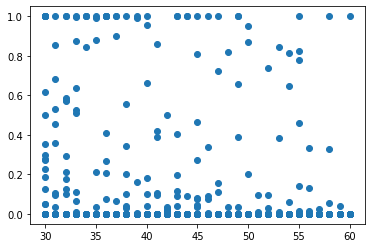

In [26]:
df = df_bal_list[364]
plt.scatter(df['cus_age'], df['kor_ovs_amt_ratio'])

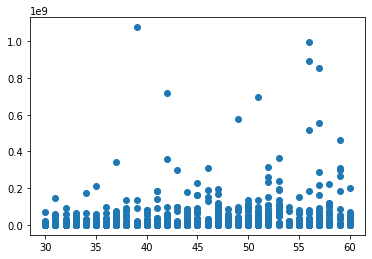

In [27]:
df = df_bal_list[364]
plt.scatter(df['cus_age'], df['tot_aet_amt_kor_stk'])